In [1]:
import torch

from dataset import CapchaDataset
from matplotlib import pyplot as plt
from model import CRNN
from utils import Decoder, get_dataloader, inference

In [2]:
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

In [3]:
test_set = CapchaDataset((3, 5))

decoder = Decoder(
    labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-'],
    blank_idx=test_set.blank_label,
)

In [4]:
checkpoint_filepath = 'best_model.pth'

model = CRNN(n_classes=test_set.num_classes).to(device)

model.load_state_dict(torch.load(checkpoint_filepath))

<All keys matched successfully>

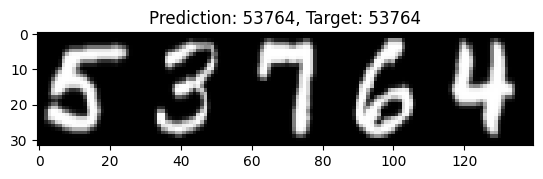

In [5]:
image, prediction, target = inference(
    model=model,
    dataset=test_set,
    decoder=decoder,
    device=device,
)

plt.title('Prediction: {0}, Target: {1}'.format(prediction, target))
plt.imshow(image, cmap='gray')
plt.show()